<a href="https://colab.research.google.com/github/jobende-OSU/CS4783-Assignment3/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Keras and other relevant packages.
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Attain the relevant datasets.
(mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y) = keras.datasets.mnist.load_data()
(cifar_train_x, cifar_train_y), (cifar_test_x, cifar_test_y) = keras.datasets.cifar10.load_data()

# Normalize values.
mnist_train_x, mnist_test_x = mnist_train_x / 255.0, mnist_test_x / 255.0
cifar_train_x, cifar_test_x = cifar_train_x / 255.0, cifar_test_x / 255.0

# Make images have a flat 3rd dimension on the datasets.
mnist_train_x, mnist_test_x = np.expand_dims(mnist_train_x, -1), np.expand_dims(mnist_test_x, -1)
cifar_train_x, cifar_test_x = np.expand_dims(cifar_train_x, -1), np.expand_dims(cifar_test_x, -1)

# Make class vectors matrices of binary classes for categorical classification.
mnist_train_y = keras.utils.to_categorical(mnist_train_y, 10)
mnist_test_y = keras.utils.to_categorical(mnist_test_y, 10)
cifar_train_y = keras.utils.to_categorical(cifar_train_y, 10)
cifar_test_y = keras.utils.to_categorical(cifar_test_y, 10)

170498071/170498071 [==============================] - 3s 0us/step


# Question 1

For conciseness, I did not include the code blocks I used for testing other configurations of the hyperparameters in the notebook. However, I do talk about the best accuracy I was able to achieve with them in my textual answer below each of my best results, which is sufficent enough to recreate those experiments if needed.

In [ ]:
# Define all 3 models.

# Ten layers with num of filters going from 12 to 128.
def increase_model(summary=False):
  model = keras.models.Sequential()
  for x in range(10): 
    model.add(keras.layers.Conv2D(int(128 * (x / 10.0)) + int(128 * 0.1), (3, 3), 
                                  activation='relu', input_shape = (28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  if summary:
    model.summary()
  return model

# Ten layers with num of filters going from 128 to 12.
def decrease_model(summary=False):
  model = keras.models.Sequential()
  for x in range(10): 
    model.add(keras.layers.Conv2D(128 - int(128 * (x / 10.0)), (3, 3), 
                                  activation='relu', input_shape = (28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  if summary:
    model.summary()
  return model

# Ten layers with num of filters going from 64 to 128 to 76.
def glass_model(summary=False):
  model = keras.models.Sequential()
  for x in range(10): 
    model.add(keras.layers.Conv2D(128 - int(128 * (abs(x - 5) / 10.0)), (3, 3), 
                                  activation='relu', input_shape = (28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  if summary:
    model.summary()
  return model

In [ ]:
# Training function.
def train_model(model, optimizer, batch_size, verbose=0):
  # Train the model.
  epochs = 25
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  history = model.fit(mnist_train_x, mnist_train_y, batch_size=batch_size, 
                    epochs=epochs, validation_data=(mnist_test_x, mnist_test_y),
                    verbose=verbose)
  test_loss, test_acc = model.evaluate(mnist_test_x,  mnist_test_y, verbose=0)

  # Return the accuracy.
  return history, test_loss, test_acc

### Increasing Filters

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 12)        120       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 24)        2616      
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 37)        8029      
                                                                 
 conv2d_12 (Conv2D)          (None, 20, 20, 50)        16700     
                                                                 
 conv2d_13 (Conv2D)          (None, 18, 18, 63)        28413     
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 76)        43168     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 88)       

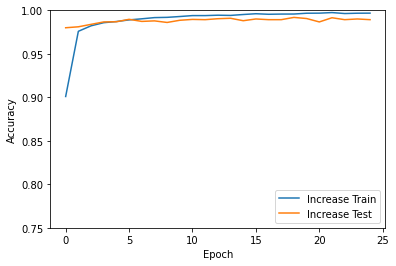

In [ ]:
# Increasing Filters
model1 = increase_model(True)
batch_size = 128
optimizer = keras.optimizers.Adam(learning_rate=0.001)
history1, test_loss, test_acc = train_model(model1, optimizer, batch_size, verbose=0)

# Evaluate the data.
plt.plot(history1.history['accuracy'], label='Increase Train')
plt.plot(history1.history['val_accuracy'], label = 'Increase Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.title("Increasing History")
print(f"Increasing:\tLoss={test_loss}\tAccuracy={test_acc}")

There are a decent number of observations I made about this network. It converged very well in the training set with an accuracy higher than 99.5%. This appears to not be an overfit since the testing accuracy was about ~99% as well. Also, it only took around 4 minutes to train for 25 epochs.

I went with using Adam and a learning rate of 0.001 with a batch size of 128. My best attempt using SGD had a learning rate of 0.01 and a batch size of 128, obtaining an average accuracy of 98.5%. The best attempt I had with RMSprop used 0.001 for the learning rate and 128 for the batch size and could only get an accuracy of 98.75% on average. Other batch sizes I attempted with each of these optimizers did not perform as well as 128.

### Decreasing Filters

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 116)       133748    
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 103)       107635    
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 90)        83520     
                                                                 
 conv2d_23 (Conv2D)          (None, 18, 18, 77)        62447     
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 64)        44416     
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 52)       

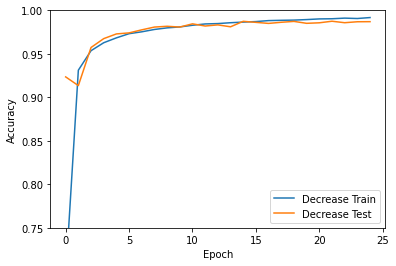

In [ ]:
# Decreasing Filters
model2 = decrease_model(True)
batch_size = 64
optimizer = keras.optimizers.SGD(learning_rate=0.01)
history2, test_loss, test_acc = train_model(model2, optimizer, batch_size, verbose=0)

# Visualize data for evaluating.
plt.plot(history2.history['accuracy'], label='Decrease Train')
plt.plot(history2.history['val_accuracy'], label = 'Decrease Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.title("Decreasing History")
print(f"Decreasing:\tLoss={test_loss}\tAccuracy={test_acc}")

Like the increasing network, this model also obtained a very high accuracy in both sets. One noticable difference between the networks though is that the training and testing accuracy are much closer in comparison, making the loss lower in comparison. Additionally, this model takes about 60% longer to train than the increasing model for the same hyperparameters.

I settled on using SGD with 0.01 as my learning rate and 64 as my batch size. Higher batch sizes I tested with exclusively lowered the accuracy, and other learning rates I tried above and including 0.1 caused training failure and wouldn't learn regardless of the batch size I chose. In the end, it had about 99% for the training accuracy and ~98.5% for the testing accuracy. 

Adam surprising did not perform as well with the optimal settings I found being 0.001 for the rate and 64 for the batch size. It had only slightly worse performance with about 0.01 greater loss than SGD and equivalent accuracy. RMSprop also did worse, only obtaining an accuracy of 98.5% when using the same parameters as Adam's best case. 

### Hour Glass Filters

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 77)        44429     
                                                                 
 conv2d_31 (Conv2D)          (None, 22, 22, 90)        62460     
                                                                 
 conv2d_32 (Conv2D)          (None, 20, 20, 103)       83533     
                                                                 
 conv2d_33 (Conv2D)          (None, 18, 18, 116)       107648    
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 128)       133760    
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 116)      

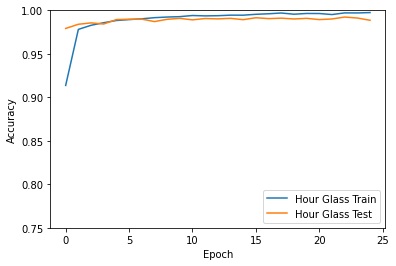

In [ ]:
# Hour Glass Filters
model3 = glass_model(True)
batch_size = 128
optimizer = keras.optimizers.Adam(learning_rate=0.001)
history3, test_loss, test_acc = train_model(model3, optimizer, batch_size, verbose=0)

# Visualize data for evaluating.
plt.plot(history3.history['accuracy'], label='Hour Glass Train')
plt.plot(history3.history['val_accuracy'], label = 'Hour Glass Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.title("Hour Glass History")
print(f"Hour Glass:\tLoss={test_loss}\tAccuracy={test_acc}")

This model shares similarities with both of the previous two. The accuracy in both the training and test set are close together, the training accuracy is nearly 100%, and it was the most consistent with its accuracy between epochs. However, this model takes about twice as long to train as the increasing network.

Like with the increasing model, the best settings I found for this network were using Adam with 0.001 for the learning rate and 128 for the batch size. Ultimately, I managed to achieve a training accuracy close to 100% and a testing accuracy of about 99%.

Testing with SGD, higher batch sizes that I tried lessened accuracy and caused the testing accuracy to be much less stable. Additionally, using 0.01 for the rate and 64 for the batch size consistently had around 2% less accuracy in both sets. When using a rate of 0.1 and batchs of 128, its performance was equivalent to that of Adam, but with less stability. 

RMSprop performed equally to Adam in both remaining stable and in making predictions. Like Adam, the best configuration I found used 0.001 for the learning rate and 128 for the batch size. The only way that Adam performed better is in regards to loss. RMSprop's loss was 0.02 higher than Adam's. 

### Conclusions

In [ ]:
# Print the final accuracy.
_, _ = model1.evaluate(mnist_test_x,  mnist_test_y, verbose=2)
_, _ = model2.evaluate(mnist_test_x,  mnist_test_y, verbose=2)
_, _ = model3.evaluate(mnist_test_x,  mnist_test_y, verbose=2)

313/313 - 1s - loss: 0.0483 - accuracy: 0.9893 - 1s/epoch - 4ms/step
313/313 - 2s - loss: 0.0431 - accuracy: 0.9870 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 0.0418 - accuracy: 0.9886 - 2s/epoch - 5ms/step


Overall, all three models acheived a testing accuracy of about 99% on average. However, since their performance in regards to accuracy and loss are so similar, the most meaningful comparison to make between them is how long they take to train. The increasing network took only 5 minutes to train on the GPU in comparison to the decreasing and hour glass networks' times of 8 and 9 minutes respectively. This makes it the best performing model of the 3 since they are all equally accurate in making predictions with my best configurations.

# Question 2

There's a decent chance that the loops below will cause the runtime to run out of memory when ran together. If this occurs, only execute the required blocks and continue from where it terminated. Apologies for this inconvenience.

In [2]:
# Define a model.
def LeNet_Model(summary=False):
  model = keras.models.Sequential()
  model.add(keras.layers.Conv2D(6, (5, 5), strides=(1, 1), activation='relu', input_shape = (32, 32, 3)))
  model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2)))
  model.add(keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'))
  model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2)))
  model.add(keras.layers.Conv2D(120, (5, 5), strides=(1, 1), activation='relu'))
  model.add(keras.layers.Flatten()) # Needed to get (None, <classes>) output.
  model.add(keras.layers.Dense(84, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  if summary:
    model.summary()
  return model

In [3]:
def LeNet_Train(learning_rate, batch_size, model=None, verbose=0):
  # Train the model.
  epochs = 25
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  if model == None:
    model = LeNet_Model();
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  history = model.fit(cifar_train_x, cifar_train_y, batch_size=batch_size, 
                    epochs=epochs, validation_data=(cifar_test_x, cifar_test_y),
                    verbose=verbose)
  test_loss, test_acc = model.evaluate(cifar_test_x,  cifar_test_y, verbose=0)
  # Return the accuracy.
  return history, test_loss, test_acc

### Part 1

In [ ]:
# Batch size is constant for trials so that the effect of learning rate is isolated.
batch_size = 512
rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Get initial weights and save them so the same model can be recycled.
model = LeNet_Model()
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=rates[0]), metrics=["accuracy"])
weights = model.get_weights()

In [ ]:
# Loop through the first five learning rates.
for rate in rates[:5]:
  # Reset the models weights to default (may be redundant).
  model.set_weights(weights)
  
  # Train the model with the current learning rate.
  _, test_loss, test_acc = LeNet_Train(rate, batch_size, model)

  # Check if the loss is ~2.3. If it is, the model failed to converge.
  if (round(test_loss, 1) == 2.3):
    print(f"({rate}, {batch_size}):\tLoss={test_loss}\tAccuracy={test_acc}\t(Training Failed)")
  else:
    print(f"({rate}, {batch_size}):\tLoss={test_loss}\tAccuracy={test_acc}")

  # Mitigates OOM errors.
  keras.backend.clear_session() 
  del _

(0.001, 512):	Loss=1.1545182466506958	Accuracy=0.5902000069618225
(0.002, 512):	Loss=1.0924021005630493	Accuracy=0.6233000159263611
(0.003, 512):	Loss=1.0686805248260498	Accuracy=0.636900007724762
(0.004, 512):	Loss=1.181390643119812	Accuracy=0.6171000003814697
(0.005, 512):	Loss=1.236961007118225	Accuracy=0.5860999822616577


In [ ]:
# Loop through the remaining learning rates.
for rate in rates[5:]:
  # Reset the models weights to default (may be redundant).
  model.set_weights(weights)
  
  # Train the model with the current learning rate.
  _, test_loss, test_acc = LeNet_Train(rate, batch_size, model)

  # Check if the loss is ~2.3. If it is, the model failed to converge.
  if (round(test_loss, 1) == 2.3):
    print(f"({rate}, {batch_size}):\tLoss={test_loss}\tAccuracy={test_acc}\t(Training Failed)")
  else:
    print(f"({rate}, {batch_size}):\tLoss={test_loss}\tAccuracy={test_acc}")

  # Mitigates OOM errors.
  keras.backend.clear_session() 
  del _

(0.006, 512):	Loss=1.168931007385254	Accuracy=0.6083999872207642
(0.007, 512):	Loss=1.3539535999298096	Accuracy=0.5486999750137329
(0.008, 512):	Loss=1.3349921703338623	Accuracy=0.565500020980835
(0.009, 512):	Loss=1.58746337890625	Accuracy=0.47929999232292175
(0.01, 512):	Loss=1.5886863470077515	Accuracy=0.43779999017715454


(0.003, 512):	Loss=1.0720142126083374	Accuracy=0.6299999952316284


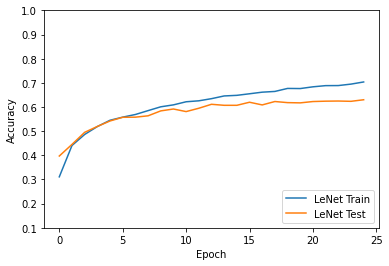

In [ ]:
model.set_weights(weights)
history, test_loss, test_acc = LeNet_Train(0.003, batch_size, model)

# Make visuals for evaluating.
plt.plot(history.history['accuracy'], label='LeNet Train')
plt.plot(history.history['val_accuracy'], label = 'LeNet Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')
plt.title("LeNet Best LR History")

print(f"({0.003}, {batch_size}):\tLoss={test_loss}\tAccuracy={test_acc}")
keras.backend.clear_session() # Mitigates OOM errors.

Prior testing showed that learning rates above 0.01 would typically fail to converge using Adam, so I limited my testing to the range of 0.001 to 0.01. From this range, the best performing learning rate using a batch size of 512 was 0.003. It achieved an accuracy of around 63% and a loss of ~1.07.

The only perceivable effect the learning rate had on the training process was the rate that the model converged to its max accuracy. Lower rates had better stability, but converged the slowest, and vice versa. It did not have an impact on the time required for each epoch.

### Part 2

In [ ]:
# Learning rate is constant for trials so that the effect of batch size is isolated.
learning_rate = 0.003
batchs = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Get initial weights and save them so the same model can be recycled.
model = LeNet_Model()
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=["accuracy"])
weights = model.get_weights()

In [ ]:
# Loop through the first five batch sizes.
for batch in batchs[:5]:
  # Reset the models weights to default (may be redundant).
  model.set_weights(weights)

  # Train the model with the current batch size.
  _, test_loss, test_acc = LeNet_Train(learning_rate, batch, model)

  # Check if the loss is ~2.3. If it is, the model failed to converge.
  if (round(test_loss, 1) == 2.3):
    print(f"({learning_rate}, {batch}):\tLoss={test_loss}\tAccuracy={test_acc}\t(Training Failed)")
  else:
    print(f"({learning_rate}, {batch}):\tLoss={test_loss}\tAccuracy={test_acc}")

  # Mitigates OOM errors.
  keras.backend.clear_session() 
  del _

(0.003, 16):	Loss=1.4351526498794556	Accuracy=0.5217999815940857
(0.003, 32):	Loss=1.3908169269561768	Accuracy=0.5608000159263611
(0.003, 64):	Loss=1.414976716041565	Accuracy=0.5777000188827515
(0.003, 128):	Loss=1.3623690605163574	Accuracy=0.588699996471405
(0.003, 256):	Loss=1.2399520874023438	Accuracy=0.6133000254631042


In [ ]:
# Loop through the remaining batch sizes.
for batch in batchs[5:]:
  # Reset the models weights to default (may be redundant).
  model.set_weights(weights)

  # Train the model with the current batch size.
  _, test_loss, test_acc = LeNet_Train(learning_rate, batch, model)

  # Check if the loss is ~2.3. If it is, the model failed to converge.
  if (round(test_loss, 1) == 2.3):
    print(f"({learning_rate}, {batch}):\tLoss={test_loss}\tAccuracy={test_acc}\t(Training Failed)")
  else:
    print(f"({learning_rate}, {batch}):\tLoss={test_loss}\tAccuracy={test_acc}")

  # Mitigates OOM errors.
  keras.backend.clear_session() 
  del _

(0.003, 512):	Loss=1.0924733877182007	Accuracy=0.6402999758720398
(0.003, 1024):	Loss=1.092746376991272	Accuracy=0.6305000185966492
(0.003, 2048):	Loss=1.1511491537094116	Accuracy=0.5961999893188477
(0.003, 4096):	Loss=1.23997163772583	Accuracy=0.5605000257492065


(0.003, 512):	Loss=1.093488335609436	Accuracy=0.6324999928474426


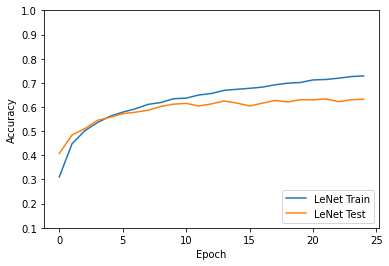

In [ ]:
model.set_weights(weights)
history, test_loss, test_acc = LeNet_Train(learning_rate, 512, model)

# Make visuals for evaluating.
plt.plot(history.history['accuracy'], label='LeNet Train')
plt.plot(history.history['val_accuracy'], label = 'LeNet Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')
plt.title("LeNet Best Batch History")

print(f"({learning_rate}, {512}):\tLoss={test_loss}\tAccuracy={test_acc}")
keras.backend.clear_session() # Mitigates OOM errors.

Using the optimal learning rate found in the last part, 0.003, the best batch size was computed to be 512 as seen in the data above. With it, it was able to reach a test accuracy of ~62-64%. The primary effect that batch size has on the training process is how long training lasts. Higher batch sizes took much less time, but suffered from diminishing returns after surpassing a size of 512. 

### Part 3

In [ ]:
# Define a model.
# Hyperparameters are # of kernels in each layer, their size, the stride, and the size of pooled kernels.
def LeNet_Model2(summary=False):
  kernel_size = (3, 3)
  model = keras.models.Sequential()
  model.add(keras.layers.Conv2D(6*2, kernel_size, strides=(1, 1), activation='relu', input_shape = (32, 32, 3)))
  model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2)))
  model.add(keras.layers.Conv2D(16*2, kernel_size, strides=(1, 1), activation='relu'))
  model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2)))
  model.add(keras.layers.Conv2D(120*2, kernel_size, strides=(1, 1), activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten()) # Needed to get (None, <classes>) output.
  model.add(keras.layers.Dense(84, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  if summary:
    model.summary()
  return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 12)        336       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 12)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        3488      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 240)         69360     
                                                                 
 dropout_6 (Dropout)         (None, 4, 4, 240)        

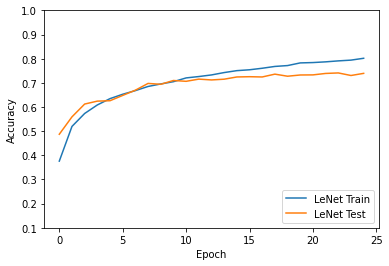

In [ ]:
# Best settings found in Parts 1 & 2
learning_rate = 0.003
batch_size = 512

# Run on the customized model.
model2 = LeNet_Model2(True)
history, test_loss, test_acc = LeNet_Train(learning_rate, batch_size, model2)

# Make visuals for evaluating.
plt.plot(history.history['accuracy'], label='LeNet Train')
plt.plot(history.history['val_accuracy'], label = 'LeNet Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')
plt.title("LeNet Best Config History")
print(f"({learning_rate}, {batch_size}):\tLoss={test_loss}\tAccuracy={test_acc}")

By reducing the size of kernels in each convolutional layer to (3, 3), I caused the training accuracy of the model to skyrocket to ~90%. This resulted in severe overfitting, so I added in a dropout layer after the final convolution layer with a probability of 0.5 to regularize it. This had a significant impact on the results, raising the testing accuracy by about 10% when combined with my other changes.

Doubling the number of kernels in each layer raised both the training and testing accuracy by ~8%. I left the strides for the convolution layers at (1, 1) since increasing them had a negative impact on the accuracy and loss. Additionally, increasing the size of the pooling layers also had a negative impact, so I left it at (2, 2) as well. Ultimately, I was able to achieve a training accuracy of ~80% and a testing accuracy of ~74%.

### Part 4

In [4]:
# Model definition for the feed forward equivalent of LeNet.
def FF_Model(summary=False):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
  model.add(keras.layers.Dense(6, activation='relu'))
  model.add(keras.layers.Dense(16, activation='relu'))
  model.add(keras.layers.Dense(120, activation='relu'))
  model.add(keras.layers.Dense(84, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  if summary:
    model.summary()
  return model

#### Part A

(0.003, 512):	Loss=1.806210994720459	Accuracy=0.3337000012397766


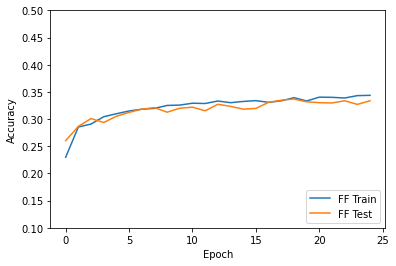

In [ ]:
# Training settings.
learning_rate = 0.003
batch_size = 512

# Create and train the model.
history, test_loss, test_acc = LeNet_Train(learning_rate, batch_size, FF_Model(), verbose=0)

# Make visuals for evaluating.
plt.plot(history.history['accuracy'], label='FF Train')
plt.plot(history.history['val_accuracy'], label = 'FF Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.5])
plt.legend(loc='lower right')
plt.title("LeNet Feed Forward History")
print(f"({learning_rate}, {batch_size}):\tLoss={test_loss}\tAccuracy={test_acc}")

The equivalent feed forward network performed significantly worse than both the original LeNet implementation and my own variant. With a batch size of 512 and a learning rate of 0.003, it was able to achieve a test accuracy of ~33.5%. I also attempted using 0.001 for the learning rate and 128 for the batch size, but it performed about the same and took longer to train. 

I don't believe that more training would allow it to get significantly better accuracy, since its accuracy curve above has already topped out in the graph in the best case scenario. I believe that significant changes to the networks layers would need to be made to achieve any further significant increases in accuracy.

#### Part B

In [ ]:
# Print the model summaries.
LeNet_Model(True)
FF_Model(True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_9 (Flatten)         (None, 120)              

The model uses 31,604 parameters in total, in comparison to LeNet's 62,006. Since it uses significantly less parameters, the amount of time needed for each epoch is also much less. However, I don't believe that makes the reduction in parameters preferable still since the drop in accuracy is too drastic for the same amount of training time.

# Question 3

In [ ]:
X = np.array([[7, 5, 0, 0, 3, 2],
              [6, 4, 5, 1, 4, 8],
              [9, 0, 2, 2, 5, 4],
              [6, 3, 4, 7, 9, 8],
              [5, 7, 5, 6, 9, 0],
              [7, 9, 0, 8, 2, 3]])

f = np.array([[1, 0, -1],
              [2, 0, -2],
              [1, 0, -1]])

### Part 1

In [ ]:
numParam = f.shape[0] * f.shape[1] + 1
print(f"Input Shape: {X.shape}\nKernel Shape: {f.shape}\nKernel Parameters: {numParam}")

Input Shape: (6, 6)
Kernel Shape: (3, 3)
Kernel Parameters: 10


The input dimensions are (6, 6) and the kernel dimensions are (3, 3). The number of parameters in the kernel is given by the function $n = f_x * f_y + 1$, which is equal to 10.

### Part 2

In [ ]:
# Function used to convolve an input with a given kernel 
def convolve(input, kernel):
  # Get the spatial size of the output.
  size = input.shape[0] - kernel.shape[0] + 1
  output = np.zeros((size, size))

  # Flip the kernel for cross correlation.
  kernel = np.flip(kernel)
  kSize = kernel.shape[0]

  # Iterate across the input matrix.
  for x in range(size):
    for y in range(size):
      # Define the output value as the sum of the kernel matrix cross multiplied
      # by the equivalent sector of input. For a 3x3 filter and x=0, y=0, the
      # used sector would be the 8 cells surrounding (1, 1) along with itself.
      output[x, y] = np.sum(kernel * input[x: x + kSize, y: y + kSize])
  return output

output = convolve(X, f)
print(output)

[[-16.  -9.   4.  18.]
 [-17.   5.  10.  12.]
 [-11.   9.  17.  -2.]
 [ -9.   1.  15. -16.]]


The output activation map when applying the convolutional operation on the $X$ using kernel $f$ is the above output. I used code to find the output by programming a limited convolve function that iterates over the input and sums the cross product of a flipped version of the kernel with slices of the input to convolve.

### Part 3

In [ ]:
# Function for finding the max of pools gathered from an input matrix.
def max_pooling(input, size, stride):
  # Get all maxed pools.
  pools = np.array([])
  for x in range(0, input.shape[0], stride):
    for y in range(0, input.shape[0], stride):
      pools = np.append(pools, np.max(input[x: x + size, y: y + size]))

  # Reshape the output to correct dimensions.
  return pools.reshape((size, size))

# Hyperparameters.
size = 2
stride = 2

# Find the maximized pools.
pooled = max_pooling(output, size, stride)
print(pooled)

[[ 5. 18.]
 [ 9. 17.]]


The output when applying a max-pooling operation on the output from the last part using a pool size of 2 and a stride of 2 is the above 2 by 2 matrix. With these settings, the resulting output is the highest value in each 2 by 2 quadrent of the last part's output. 

I used code to find the output by writing a simple max pooling function that both obtains and maxes pools from an input given also a size for the pools and a stride.  Because it wasn't necessary for my data and input, the function does not assert pools to be of the correct size when using other stride values.